In [1]:
import my_module as mm
nets = []
convs = [8, 16, 32, 64]
fcs = [256, 128, 32]
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

# categories = [
#     "anger",
#     "surprise",
#     "disgust",
#     "fear",
#     "neutral",
#     "happiness",
#     "sad",
# ]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories, limit = 500)
# X, y = mm.read_pic(mm.pd.read_csv('data/500_picts_satz.csv'), categories)
seed = 1234
Xtr, Xva, ytr, yva = mm.train_test_split(X, y, test_size=0.2, random_state=seed)
trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva)
print("Done")

Done


In [3]:
for i in range(2, -1, -1):
    for j in range(1, 5):
        nets.append(mm.Net(1, 350, 350, 8, convs[:j], fcs[i:]))
        print(f'Done with a CNN has {len(convs[:j])} convs layers and {len(fcs[i:])} linear layers')

Done with a CNN has 1 convs layers and 1 linear layers
Done with a CNN has 2 convs layers and 1 linear layers
Done with a CNN has 3 convs layers and 1 linear layers
Done with a CNN has 4 convs layers and 1 linear layers
Done with a CNN has 1 convs layers and 2 linear layers
Done with a CNN has 2 convs layers and 2 linear layers
Done with a CNN has 3 convs layers and 2 linear layers
Done with a CNN has 4 convs layers and 2 linear layers
Done with a CNN has 1 convs layers and 3 linear layers
Done with a CNN has 2 convs layers and 3 linear layers
Done with a CNN has 3 convs layers and 3 linear layers
Done with a CNN has 4 convs layers and 3 linear layers


In [4]:
count = 0
DIR_PATH = './model/'
mm.os.makedirs(DIR_PATH, exist_ok = True)
for net in nets:
    if mm.torch.cuda.is_available():
        net.cuda()
    net = mm.train_process2(device, net, trainloader, LR = 0.5, EPOCH = 5, PRINT = 100)
    count += 1
    PATH = DIR_PATH + "model_" + str(count) + ".pth"
    mm.torch.save(net.state_dict(), PATH)
    print(PATH, "done.")

CrossEntropyLoss()
[1,   100] loss: 1.900
[2,   100] loss: 1.867
[3,   100] loss: 1.902
[4,   100] loss: 1.894
[5,   100] loss: 1.927
Finished Training
./model/model_1.pth done.
CrossEntropyLoss()
[1,   100] loss: 1.687
[2,   100] loss: 1.679
[3,   100] loss: 1.704
[4,   100] loss: 1.684
[5,   100] loss: 1.682
Finished Training
./model/model_2.pth done.
CrossEntropyLoss()
[1,   100] loss: 1.681
[2,   100] loss: 1.729
[3,   100] loss: 1.712
[4,   100] loss: 1.707
[5,   100] loss: 1.694
Finished Training
./model/model_3.pth done.
CrossEntropyLoss()
[1,   100] loss: 2.242
[2,   100] loss: 2.244
[3,   100] loss: 2.239
[4,   100] loss: 2.234
[5,   100] loss: 2.237
Finished Training
./model/model_4.pth done.
CrossEntropyLoss()
[1,   100] loss: 2.089
[2,   100] loss: 2.064
[3,   100] loss: 2.049
[4,   100] loss: 2.052
[5,   100] loss: 2.102
Finished Training
./model/model_5.pth done.
CrossEntropyLoss()
[1,   100] loss: 1.728
[2,   100] loss: 1.717
[3,   100] loss: 1.692
[4,   100] loss: 1.699

In [5]:
training_error = []
testing_error = []
count = 0
for net in nets:
    if mm.torch.cuda.is_available():
        net.cuda()
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    count += 1
    print("Done for model", count)

Done for model 1
Done for model 2
Done for model 3
Done for model 4
Done for model 5
Done for model 6
Done for model 7
Done for model 8
Done for model 9
Done for model 10
Done for model 11
Done for model 12


[0.6325000000000001, 0.4175, 0.44499999999999995, 0.9625, 0.815, 0.405, 0.65, 0.4125, 0.84, 0.4075, 0.9275, 0.6575]
[0.5900000000000001, 0.42000000000000004, 0.39, 0.98, 0.78, 0.39, 0.65, 0.43000000000000005, 0.91, 0.4, 0.9, 0.65]


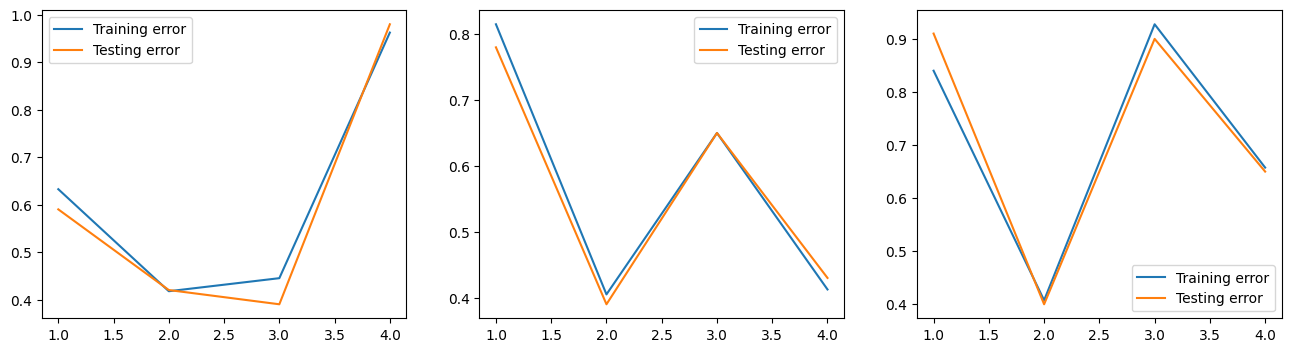

In [6]:
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(1,3, figsize=(16,4))

print(training_error)
print(testing_error)

M = [1, 2, 3, 4]

for i in range(3):
    l = i * 4
    r = i * 4 + 4
    ax[i].plot(M, training_error[l:r], label="Training error")
    ax[i].plot(M, testing_error[l:r], label="Testing error")
    ax[i].legend()

FIG_PATH = './plot/'
mm.os.makedirs(FIG_PATH, exist_ok = True)
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"on500_{current_time}.png"
fig.savefig(FIG_PATH + filename)